
<center>
<hr>
<hr>
<font style="font-size:5.4em ; color:black'" > 
<span style="background : yellow">
#4 Optimization
</span>
</font>
<hr>
<hr>
</center>


In [2]:
%matplotlib inline
from IPython.display import display,Latex,Math,HTML,clear_output
import sympy as sym
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation


<center>
<hr>
<font size="20" color='Blue' >One Dimensional Unconstrained Optimization</font>
<hr>
</center>

In [109]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = 2 sin(x)-{{x^2 \\over 10}}
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

https://www.geodose.com/2021/06/golden-section-search-python-application-example.html

In [3]:
def func(x):
    return 2*np.sin(x) - x**2/10

In [4]:
def check_pos(x1,x2):
    if x2<x1:
        label='right'
    else:
        label=''
    return label

In [5]:
def update_interior(xl,xu):
    d=((np.sqrt(5)-1)/2)*(xu-xl)
    x1=xl+d
    x2=xu-d
    return x1,x2

In [6]:
def find_min(xl,xu,x1,x2,label):
    fx1=func(x1)
    fx2=func(x2)
    if fx2>fx1 and label=='right':
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    else:
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    return xl,xu,xopt

In [7]:
def find_max(xl,xu,x1,x2,label):
    fx1=func(x1)
    fx2=func(x2)
    if fx2>fx1 and label=='right':
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    else:
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    return xl,xu,xopt


In [8]:
#PLOTTING FUNCTION
def plot_graph(xl,xu,x1,x2):
    global x,y
    
    clear_output(wait=True)
    
    #plot sinus graph
    plt.plot(x,y)
    plt.plot([0,6],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,func(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,func(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,func(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,func(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,func(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,func(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,func(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,func(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    plt.ylim([-5,2])
    plt.show()

In [13]:

def golden_search(xl,xu,mode,et):
    it=0
    e=1
    while e>=et:
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        fx1=func(x1)
        fx2=func(x2)
        label=check_pos(x1,x2)
        clear_output(wait=True)
        plot_graph(xl,xu,x1,x2) #PLOTTING
        plt.show()
        
        #SELECTING AND UPDATING BOUNDARY-INTERIOR POINTS
        if mode=='max':
            new_boundary=find_max(xl,xu,x1,x2,label)
        elif mode=='min':
            new_boundary=find_min(xl,xu,x1,x2,label)
        else:
            print('Please define min/max mode')
            break #exit if mode not min or max
        xl=new_boundary[0]
        xu=new_boundary[1]
        xopt=new_boundary[2]
        
        it+=1
        print ('Iteration: ',it)
        r=(np.sqrt(5)-1)/2 #GOLDEN RATIO
        e=((1-r)*(abs((xu-xl)/xopt)))*100 #Error
        print('Error:',e)
        time.sleep(10*math.exp(-it/10))

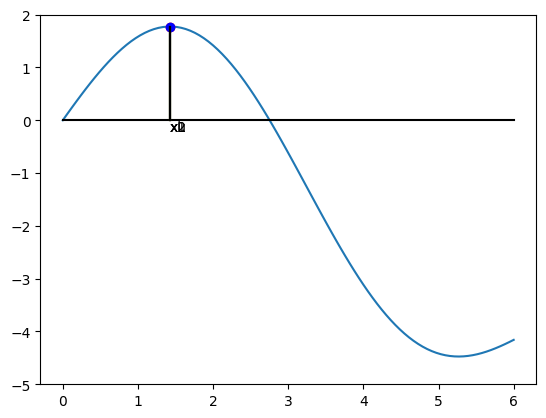

Iteration:  17
Error: 0.04497766394959603


In [14]:
x=np.linspace(0,6,100)
y=func(x)

#EXECUTING GOLDEN SEARCH FUNCTION
golden_search(0,6,'max',0.05)

<center>
<hr>
<font size="20" color='Blue' >Newton's Optimization Method</font>
<hr>
</center>

In [118]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = 2 sin(x)-{{x^2 \\over 10}}
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

In [119]:
def func(x):
    return 2*np.sin(x) - x**2/10

def dfunc(x):
    return 2*np.cos(x) - x/5

def ddfunc(x):
    return -2*np.sin(x) - 1/5

In [120]:
def plot_graph(x1):
    clear_output(wait=True)
    
    #plot sinus graph
    plt.plot(x,y)
    plt.plot([0,6],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,func(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,func(x1)],'k')
    
        
    #plot x1 line
    plt.plot([x1,x1],[0,func(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    
    #y-axis limit
    plt.ylim([-5,2])
    plt.show()

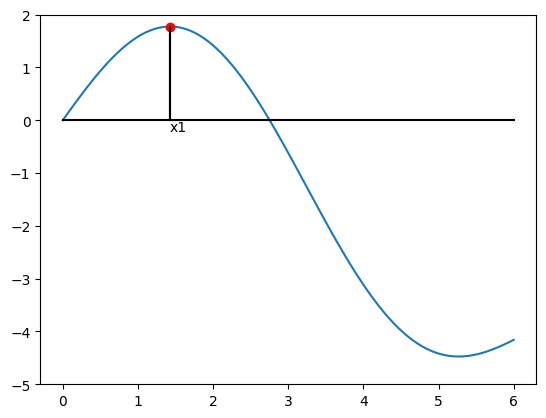

10 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00


In [121]:
xx = [2.5]
x0 = xx[0]
x=np.linspace(0,6,100)
y=func(x)
for i in range(0,10):
    x1 = x0 - dfunc(x0)/ddfunc(x0)
    plot_graph(x1)
    plt.show()
    print(f"{i+1:2} : x0 = {x0:0.5f}, x1 = {x1:.5f}  f(x) = {func(x1):.4e}")
    x0 = x1
    xx.append(x1)

In [122]:
for x in xx: print(f"{x:0.5f}")

2.50000
0.99508
1.46901
1.42764
1.42755
1.42755
1.42755
1.42755
1.42755
1.42755
1.42755


<center>
<hr>
<font size="20" color='Blue' >
Multidiminsional Optimization
</font>
<hr>
</center>

# 1. Random Search Method

In [123]:
Latex(""" \\begin{equation*} \\Huge
      f(x,y) = y - x - 2 x^2 - 2xy -y^2 
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [158]:
def fxy(x,y):
    return y - x - 2*x**2 - 2*x*y - y**2

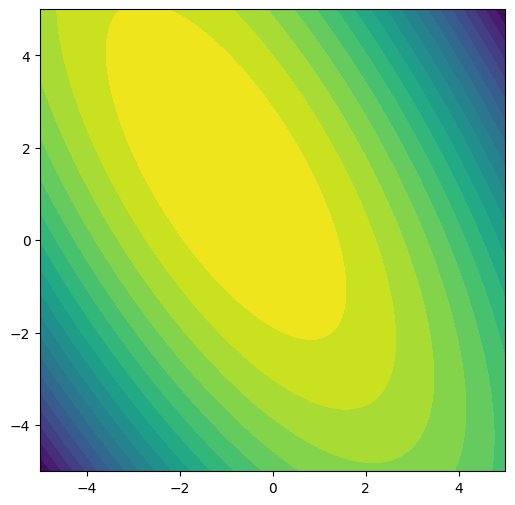

In [159]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-5, 5, 256), np.linspace(-5, 5, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 20)

# plot
fig, ax = plt.subplots()
ax.figure.set_size_inches(6, 6)
ax.contourf(X, Y, Z, levels=levels)

plt.show()

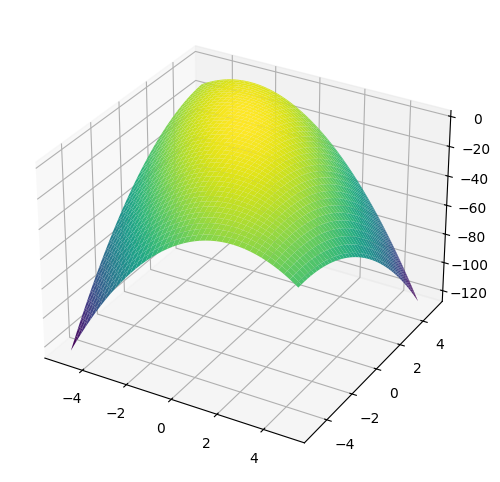

In [160]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-5, 5, 256), np.linspace(-5, 5, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 20)

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.figure.set_size_inches(6, 6)
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

iteration = 0, x = 1.59653, y = 2.55407, maxf = -18.81886
iteration = 10000, x = -0.99332, y = 1.48012, maxf = 1.24978
iteration = 20000, x = -0.99325, y = 1.48753, maxf = 1.24992
iteration = 30000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 40000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 50000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 60000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 70000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 80000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 90000, x = -0.99649, y = 1.50204, maxf = 1.24996
iteration = 100000, x = -0.99649, y = 1.50204, maxf = 1.24996
x = 1.59653, y = 2.55407, f(x,y) = -18.81886
x = -1.59255, y = 1.07489, f(x,y) = -0.13675
x = -0.39713, y = 2.39713, f(x,y) = -1.36348
x = 1.66047, y = 2.44304, f(x,y) = -18.81336
x = -0.24876, y = 1.56741, f(x,y) = 0.01543
x = 1.57870, y = 2.11691, f(x,y) = -15.61165
x = -0.14309, y = 1.14967, f(x,y) = 0.25908
x = 1.66402, y = 2

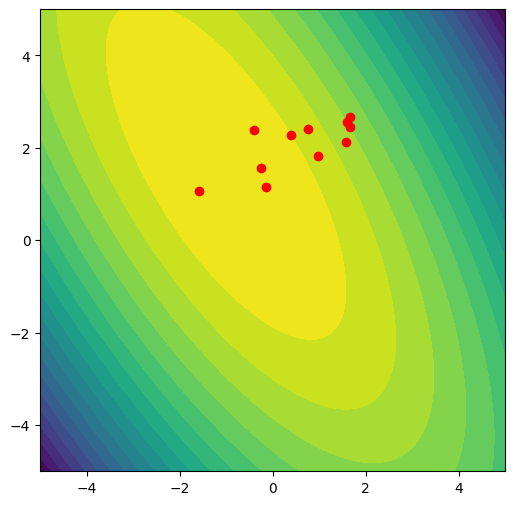

In [161]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-5, 5, 256), np.linspace(-5, 5, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 20)

# plot
fig, ax = plt.subplots()
ax.figure.set_figheight(6)
ax.figure.set_figwidth(6)
ax.contourf(X, Y, Z, levels=levels)

# import random number generator
import random
XY = []
maxf = -1e9
maxloop = 100001
# random number from 0 to 1
for i in range(maxloop):
    x = -2+4*random.random()
    y = 1+2*random.random()
    res = fxy(x,y)
    if res > maxf:
        maxf = res
        maxx = x
        maxy = y
    if i%10000==0:
        XY.append((x,y))
        print(f"iteration = {i}, x = {maxx:.5f}, y = {maxy:.5f}, maxf = {maxf:.5f}")    

for (x,y) in XY:
    print(f"x = {x:.5f}, y = {y:.5f}, f(x,y) = {fxy(x,y):.5f}")
    ax.plot(x,y,'ro')
plt.show()

# 2.  Gradient Method

In [127]:
Latex(""" \\begin{equation*} \\Huge
      f(x,y) = xy^2 
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [162]:
def fxy(x,y):
    return x*y**2

def dfxy(x,y):
    return y**2, 2*x*y

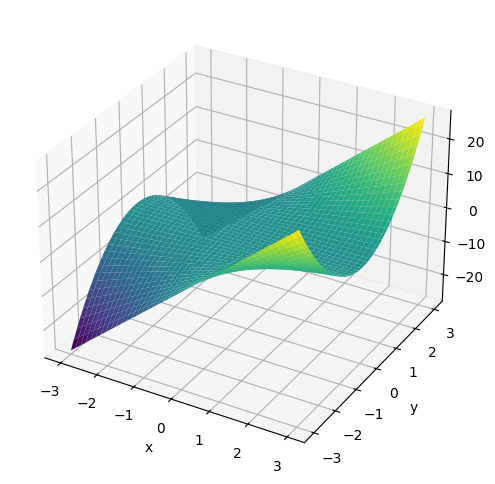

In [168]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 30)

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.figure.set_figheight(6)
ax.figure.set_figwidth(6)
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.contourf(X, Y, Z, levels=levels)
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

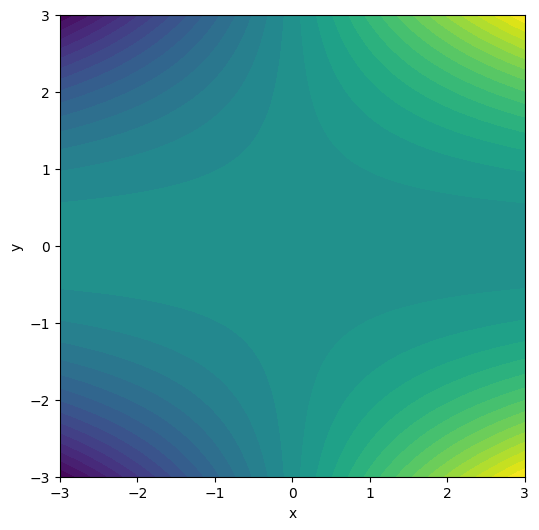

In [169]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 30)

# plot
fig, ax = plt.subplots()
ax.figure.set_figheight(6)
ax.figure.set_figwidth(6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contourf(X, Y, Z, levels=levels)

plt.show()

In [165]:
lr = 0.1
x,y = -2,-2
res = fxy(x,y)
print(f"f(x,y) = {res}")

dx,dy = dfxy(x,y)
print(f"dx = {dx}, dy = {dy}")

x = x + lr*dx
y = y + lr*dy
res = fxy(x,y)
print(f"f({x},{y}) = {res}")

dx,dy = dfxy(x,y)
print(f"dx = {dx}, dy = {dy}")


f(x,y) = -8
dx = 4, dy = 8
f(-1.6,-1.2) = -2.304
dx = 1.44, dy = 3.84


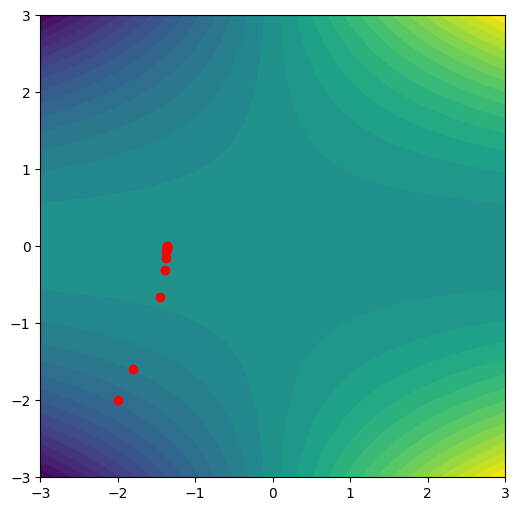

In [167]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
def plot_cont(XY):
    clear_output(wait=True)

    X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
    Z = fxy(X, Y)
    levels = np.linspace(np.min(Z), np.max(Z), 30)

    # plot
    fig, ax = plt.subplots()
    ax.figure.set_figheight(6)
    ax.figure.set_figwidth(6)
    ax.contourf(X, Y, Z, levels=levels)
    for (x,y) in XY:
        ax.plot(x,y,'ro')
    plt.show()
    return plt,ax

lr = 0.05
x,y = -2.0,-2.
XY = [(x,y)]
for i in range(51):
    res = fxy(x,y)
    if i%5==0: print(f"{i}-th: f({x:0.5},{y:0.5}) = {res:0.5}")

    dx,dy = dfxy(x,y)
    x = x + lr*dx
    y = y + lr*dy
    if i%5==0: 
        XY.append((x,y))
        plt,ax = plot_cont(XY)
        ax.plot(x,y,'ro')
        plt.show()

        # print(f'    dx = {dx:0.5}, dy = {dy:0.5}, x = {x:0.5}, y = {y:0.5}')


# for (x,y) in XY:
#     # print(f"x = {x:.5f}, y = {y:.5f}, f(x,y) = {fxy(x,y):.5f}")
#     ax.plot(x,y,'ro')



# 3.  Steepest Ascend Method

In [132]:
Latex(""" \\begin{equation*} \\Huge
      f(x,y) = 2xy +2x-x^2-2y^2 
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [172]:
def fxy(x,y):
    return 2*x*y + 2*x - x**2 - 2*y**2  

def dfxy(x,y):
    return 2*y + 2 - 2*x, 2*x - 4*y

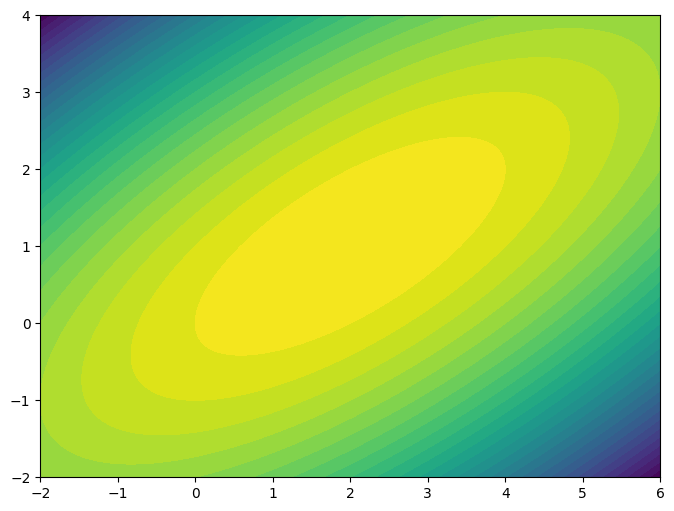

In [173]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-2, 6, 256), np.linspace(-2, 4, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 30)

# plot
fig, ax = plt.subplots()
ax.figure.set_figheight(6)
ax.figure.set_figwidth(8)
ax.contourf(X, Y, Z, levels=levels)

plt.show()

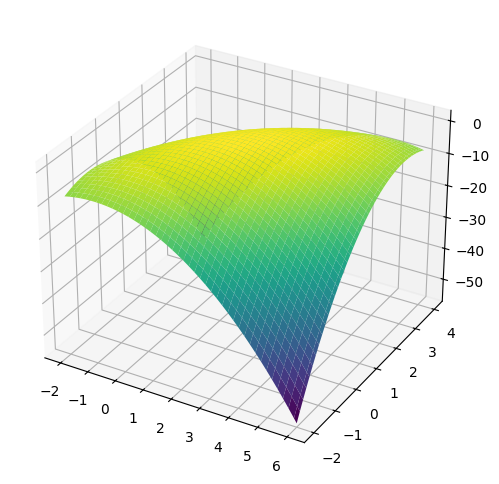

In [174]:
# plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-2, 6, 256), np.linspace(-2, 4, 256))
Z = fxy(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 30)

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.figure.set_figheight(6)
ax.figure.set_figwidth(8)
ax.plot_surface(X, Y, Z,cmap='viridis')

plt.show()

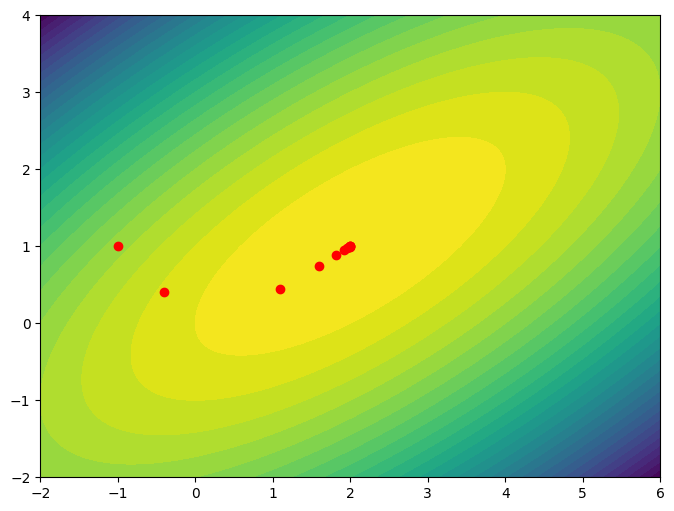

In [175]:
x,y = -1.0,1.0

def plot_cont(XY):
    clear_output(wait=True)

    X, Y = np.meshgrid(np.linspace(-2, 6, 256), np.linspace(-2, 4, 256))
    Z = fxy(X, Y)
    levels = np.linspace(np.min(Z), np.max(Z), 30)

    # plot
    fig, ax = plt.subplots()
    ax.figure.set_figheight(6)
    ax.figure.set_figwidth(8)
    ax.contourf(X, Y, Z, levels=levels)
    for (x,y) in XY:
        ax.plot(x,y,'ro')
    plt.show()
    return plt,ax

lr = 0.1
XY = [(x,y)]
for i in range(101):
    res = fxy(x,y)
    if i%10==0: print(f"{i}-th: f({x:0.5},{y:0.5}) = {res:0.5}")

    dx,dy = dfxy(x,y)
    x = x + lr*dx
    y = y + lr*dy
    if i%10==0: 
        XY.append((x,y))
        plt,ax = plot_cont(XY)
        ax.plot(x,y,'ro')
        plt.show()

        # print(f'    dx = {dx:0.5}, dy = {dy:0.5}, x = {x:0.5}, y = {y:0.5}')

In [180]:
for (x,y) in XY:
    print(f"x = {x:.5f}, y = {y:.5f}")


x = -1.00000, y = 1.00000
x = -0.40000, y = 0.40000
x = 1.09407, y = 0.44063
x = 1.59088, y = 0.74715
x = 1.81519, y = 0.88578
x = 1.91652, y = 0.94840
x = 1.96229, y = 0.97669
x = 1.98297, y = 0.98947
x = 1.99230, y = 0.99524
x = 1.99652, y = 0.99785
x = 1.99843, y = 0.99903
x = 1.99929, y = 0.99956


In [137]:
Latex(""" \\begin{equation*} \\Huge
      \\nabla f(x,y) = \\begin{bmatrix}
-2x+2y+2 \\\\
2x-4y 
\\end{bmatrix}
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [138]:
Latex(""" \\begin{equation*} \\Huge
       H = \\begin{bmatrix}
{\\partial^2 f \\over \\partial x^2} & {\\partial^2 f \\over \\partial x \\partial y} \\\\
{\\partial^2 f \\over \\partial x \\partial y} & {\\partial^2 f \\over \\partial y^2} 
\\end{bmatrix} = \\begin{bmatrix}
      
-2 & 2 \\\\
2 & -4
\\end{bmatrix}
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [139]:
Latex(""" \\begin{equation*} \\Huge
       det(H) = 4 > 0
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [140]:
def march(fs,dfs,xs,ys,x0,y0,h):
    # update dfs 
    dfs0 = dfs.subs({xs:x0,ys:y0})
    print(f'dfs0 = {dfs0}')
    xh = x0 + dfs0[0]*h
    yh = y0 + dfs0[1]*h
    gh = fs.subs({xs:xh,ys:yh})
    ghs = gh.simplify()
    print(f'gh = {gh}, ghs = {ghs}')

    ghd = gh.diff(h)
    print(f'ghd = {ghd}')

    # maximize g(h), solve g'(h) = 0
    rghd = sym.RootOf(ghd,0)
    print(f'root of diff g(h) = {rghd}')
    x0 = x0 + dfs0[0]*rghd
    y0 = y0 + dfs0[1]*rghd
    print(f'new x0 = {x0}, y0 = {y0}')
    return x0,y0


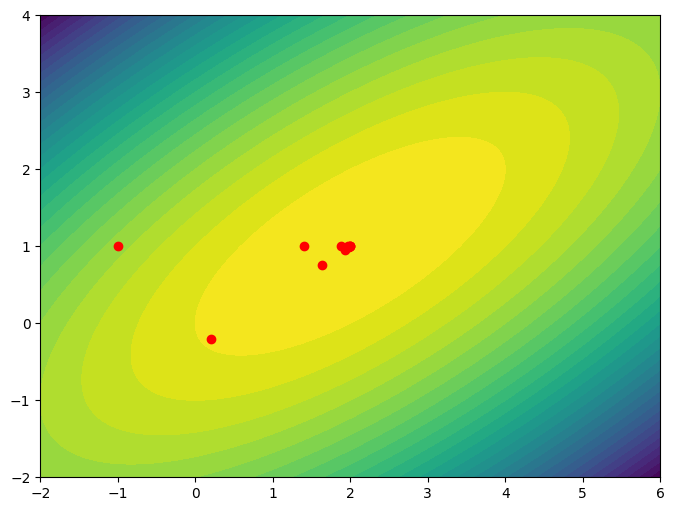

In [141]:
xs = sym.symbols('x')
ys = sym.symbols('y')
h = sym.symbols('h')

fs = 2*xs*ys + 2*xs - xs**2 - 2*ys**2
dfs = sym.Matrix([fs.diff(xs),fs.diff(ys)])
print(f'dfs = {dfs}')

HS = sym.matrices.Matrix([[fs.diff(x).diff(y) for x in [xs,ys]] for y in [xs,ys]])
print(f'HS = {HS}, deteriminant of HS = {HS.det()}')

XY = []
# initial guess
x0 = -1
y0 = 1
XY.append((x0,y0))

for i in range(10):
    x0,y0 = march(fs,dfs,xs,ys,x0,y0,h)
    XY.append((x0,y0))
print(f'XY = {XY}')

x,y = -1.0,1.0

def plot_cont(XY):
    clear_output(wait=True)

    X, Y = np.meshgrid(np.linspace(-2, 6, 256), np.linspace(-2, 4, 256))
    Z = fxy(X, Y)
    levels = np.linspace(np.min(Z), np.max(Z), 30)

    # plot
    fig, ax = plt.subplots()
    ax.figure.set_figheight(6)
    ax.figure.set_figwidth(8)
    ax.contourf(X, Y, Z, levels=levels)
    for (x,y) in XY:
        ax.plot(x,y,'ro')
    plt.show()
    return plt,ax

lr = 0.05

for (x, y) in XY:
    plt,ax = plot_cont(XY)
    ax.plot(x,y,'ro')
    plt.show()

# dfs0 = dfs.subs({xs:x0,ys:y0})
# print(f'dfs0 = {dfs0}')

# xh = x0 + dfs0[0]*h
# yh = y0 + dfs0[1]*h

# print(f'xh = {xh}, yh = {yh}')

# gh = fs.subs({xs:xh,ys:yh})
# ghs = gh.simplify()
# print(f'gh = {gh}, ghs = {ghs}')

# ghd = gh.diff(h)
# print(f'ghd = {ghd}')

# # maximize g(h), solve g'(h) = 0
# rghd = sym.RootOf(ghd,0)
# print(f'root of diff g(h) = {rghd}')

# # update x0, y0
# print(f'previous x0 = {x0}, y0 = {y0} dfx0 = {dfs0[0]}, dfy0 = {dfs0[1]}')
# x0 = x0 + dfs0[0]*rghd
# y0 = y0 + dfs0[1]*rghd
# print(f'new x0 = {x0}, y0 = {y0}')

# # update dfs 
# dfs0 = dfs.subs({xs:x0,ys:y0})
# print(f'dfs0 = {dfs0}')
# xh = x0 + dfs0[0]*h
# yh = y0 + dfs0[1]*h
# gh = fs.subs({xs:xh,ys:yh})
# ghs = gh.simplify()
# print(f'gh = {gh}, ghs = {ghs}')

# ghd = gh.diff(h)
# print(f'ghd = {ghd}')

# # maximize g(h), solve g'(h) = 0
# rghd = sym.RootOf(ghd,0)
# print(f'root of diff g(h) = {rghd}')
# x0 = x0 + dfs0[0]*rghd
# y0 = y0 + dfs0[1]*rghd
# print(f'new x0 = {x0}, y0 = {y0}')

# # update dfs 
# dfs0 = dfs.subs({xs:x0,ys:y0})
# print(f'dfs0 = {dfs0}')
# xh = x0 + dfs0[0]*h
# yh = y0 + dfs0[1]*h
# gh = fs.subs({xs:xh,ys:yh})
# ghs = gh.simplify()
# print(f'gh = {gh}, ghs = {ghs}')

# ghd = gh.diff(h)
# print(f'ghd = {ghd}')

# # maximize g(h), solve g'(h) = 0
# rghd = sym.RootOf(ghd,0)
# print(f'root of diff g(h) = {rghd}')
# x0 = x0 + dfs0[0]*rghd
# y0 = y0 + dfs0[1]*rghd
# print(f'new x0 = {x0}, y0 = {y0}')



# dxf = fs.diff(xs) 
# dyf = fs.diff(ys)
# dfs = sym.Matrix([dxf,dyf])
# print(dfs)
# dxyf = dxf.diff(ys)
# dyxf = dyf.diff(xs)
# ddxf = dxf.diff(xs)
# ddyf = dyf.diff(ys)
# print(ddxf,dxyf,dyxf,ddyf)
# HS = sym.Matrix([[ddxf,dxyf],[dyxf,ddyf]])
# print(HS)



# f = sym.Function('fxy')(x,y)
# f = 2*x*y + 2*x - x**2 - 2*y**2
# print(f)
# HS = sym.Matrix([[-2,2],[2,-4]])

In [181]:

for (x,y) in XY:
    print(f"x = {x:.5f}, y = {y:.5f}")

x = -1.00000, y = 1.00000
x = -0.40000, y = 0.40000
x = 1.09407, y = 0.44063
x = 1.59088, y = 0.74715
x = 1.81519, y = 0.88578
x = 1.91652, y = 0.94840
x = 1.96229, y = 0.97669
x = 1.98297, y = 0.98947
x = 1.99230, y = 0.99524
x = 1.99652, y = 0.99785
x = 1.99843, y = 0.99903
x = 1.99929, y = 0.99956


<center>
<hr>
<font size="20" color='Blue' >The end...</font>
<hr>
</center>